# **1. 로지스틱 회귀모형 (Logistic Regression)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
%matplotlib inline

### **1.1. 데이터 로드**

In [ ]:
# 유방암 데이터 로드 
cancer = load_breast_cancer()

# 유방암 데이터 DataFrame으로 변환
cancerDF = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [ ]:
# 유방암 데이터의 타겟 변수와 정의 (1이면 양성 종양, 0이면 악성 종양)
cancerDF['DIAG RES'] = cancer.target
# 보통 1을 주요 타겟이 되는 범주로 정의함 
cancerDF['DIAG RES'] = np.where(cancerDF['DIAG RES'] == 0, 1, 0)
cancerDF.shape
cancerDF.head(10)

,mean radius,mean texture,mean area,mean symmetry,DIAG RES
0,17.99,10.38,1001.0,0.2419,1
1,20.57,17.77,1326.0,0.1812,1
2,19.69,21.25,1203.0,0.2069,1
3,11.42,20.38,386.1,0.2597,1
4,20.29,14.34,1297.0,0.1809,1
5,12.45,15.70,477.1,0.2087,1
6,18.25,19.98,1040.0,0.1794,1
7,13.71,20.83,577.9,0.2196,1
8,13.00,21.82,519.8,0.2350,1
9,12.46,24.04,475.9,0.2030,1


### **1.2. 데이터 시각화**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


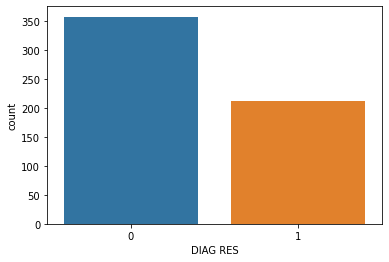

In [ ]:
# 진단 결과에 대한 분포 확인
sns.countplot(cancerDF['DIAG RES'])

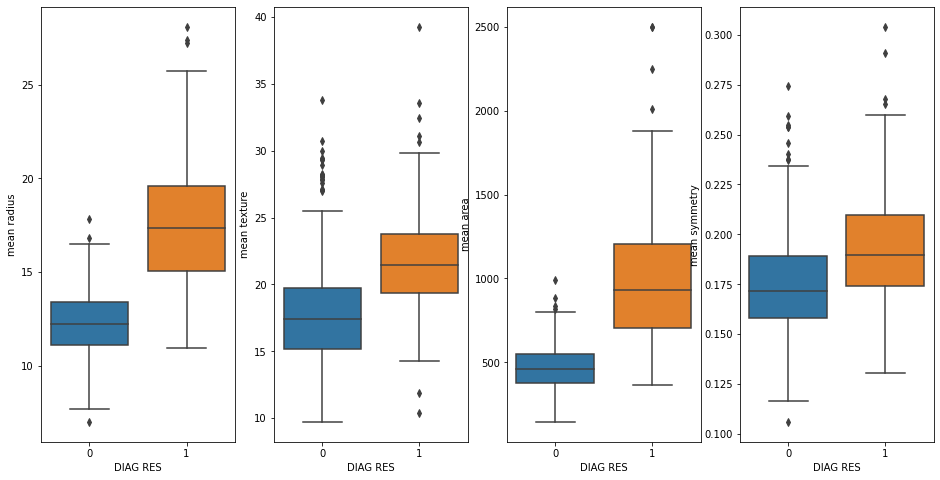

In [ ]:
# 양성 / 음성별 설명 변수의 분포 확인 
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows =1)
for i, feature in enumerate(['mean radius', 'mean texture', 'mean area', 'mean symmetry']):
  sns.boxplot(x='DIAG RES', y = feature, data = cancerDF, ax = axs[i%4])

### **1.3. 데이터 전처리 및 로지스틱 회귀모형 생성**

In [ ]:
from sklearn.linear_model import LogisticRegression

# 타겟 변수와 설명 변수 데이터를 구분
y_target = cancerDF['DIAG RES']
X_data   = cancerDF.drop(['DIAG RES'], axis = 1, inplace = False)

# 표준화 작업
scaler = StandardScaler()
scaler.fit(X_data)
X_data = pd.DataFrame(scaler.transform(X_data), columns = X_data.columns)

# 로지스틱 회귀 모형 생성
Logistic = LogisticRegression()
Logistic.fit(X_data, y_target)

LogisticRegression()

In [ ]:
# 회귀 계수 확인 
column_name = ['const'] + X_data.columns.tolist()

In [ ]:
# 베타 값 추출 
beta = np.concatenate([Logistic.intercept_, Logistic.coef_.reshape(-1)]).round(2) 
# exp(베타) 값 추출
odds = np.exp(beta).round(2) 
# beta값 비교 
beta_analysis = pd.DataFrame(np.c_[beta, odds], index = column_name, columns = ['beta', 'exp(beta)'])
beta_analysis

,beta,exp(beta)
const,-0.57,0.57
mean radius,2.05,7.77
mean texture,1.08,2.94
mean area,2.08,8.00
mean symmetry,1.37,3.94


In [ ]:
# 예측 확률
probs = Logistic.predict_proba(X_data)[:,1]

# 타겟 변수 예측
y_preds = np.where(probs.reshape(-1) >= 0.5, 1, 0)

# 예측값 비교 
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds})

,y_target,y_preds
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
564,1,1
565,1,1
566,1,1
567,1,1


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_target, y_preds))

,0,1
0,343,14
1,30,182


In [ ]:
# 타겟 변수 예측
y_preds = np.where(probs.reshape(-1) >= 0.8, 1, 0)

# 예측값 비교 
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds})

# confusion matrix
pd.DataFrame(confusion_matrix(y_target, y_preds))

,0,1
0,352,5
1,54,158


### ***참고**

In [ ]:
import statsmodels.api as sm
model = sm.Logit(y_target, X_data)
results = model.fit(method = "newton")   
results.summary()

Optimization terminated successfully.
         Current function value: 0.193036
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               DIAG RES   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 Jun 2022   Pseudo R-squ.:                  0.7077
Time:                        12:55:11   Log-Likelihood:                -109.84
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                6.227e-115
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
mean radius      -2.7594      1.613     -1.710      0.087      -5.922       0.403
mean texture      1.1749      0.194      6.053      0.000       0.794       1.555
mean area         8.2305      1.811      4.545      0.000       4.682      11.780
mean symmetry     1.5213      0.215      7.078      0.000       1.100       1.943
=================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""